In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import csv
import os
import pandas as pd
from scipy.special import gamma
import math
import multiprocessing

%matplotlib inline

#  Problem 1

In [297]:
def rich_get_richer(p):
    """
        Samples with replacement, then adds the selected element back into the distribution with probability
        p
    """
    
    #create a counter to represent the group:
    c = 1
    
    #create a list to hold the group size as it grows with time (t):
    f = [1]
    
    while 1000 not in f:
        #make a choice:
        choice = np.random.choice(['innovate','replicate'],p=[p,1-p])
        
        #decide what to do if innovating:
        if choice == 'innovate':
            c+=1
            f.append(c)
        
        #decide what to do if copying:
        else:
            #make a choice from f and pop it back into f:
            f.append(np.random.choice(f).item())
            
    return f
    

In [184]:
p_0_1 = []

#take the average over 10 trials:
for i in range(10):
    p_0_1.append(rich_get_richer(0.1))

In [185]:
counts = []
for i in p_0_1:
    counts.append(np.unique(i, return_counts=True))

In [186]:
uni_counts = []

In [187]:
len(counts[1][0])

1000

In [188]:
for i in range(len(counts)):
    uni_counts.append(counts[i][1])

In [343]:
avg_uni_counts = np.average(uni_counts, axis=0)
y1 = [i for i in range(len(avg_uni_counts))]

In [344]:
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(np.log10(y1[1:]), np.log10(sorted(avg_uni_counts[1:], reverse=True)))

C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


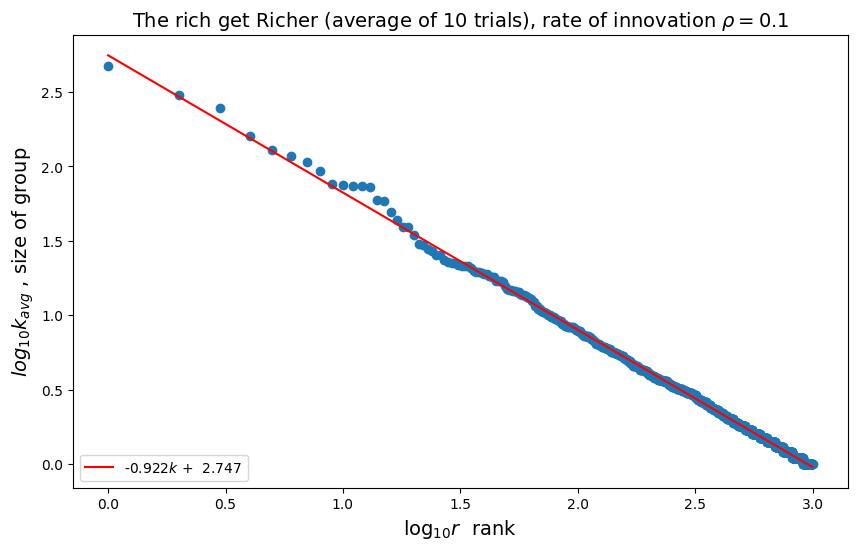

In [345]:
x = np.linspace(0,3,1000)
y = x*slope1 + intercept1
#plot them:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

plt.plot(np.log10(y1), np.log10(sorted(avg_uni_counts,reverse=True)), 'o', label='')
plt.plot(x,y,color='red', label=r'{}$k$ +  {}'.format(round(slope1,3),round(intercept1,3)))
plt.title(r'The rich get Richer (average of 10 trials), rate of innovation $\rho=0.1$', fontsize=14)
plt.xlabel(r'$\log_{10}r\ $ rank ',fontsize=14)
plt.ylabel(r'$log_{10}k_{avg}\ $, size of group',fontsize=14)
plt.legend(loc='lower left')

In [305]:
p_0_0_1= []
for i in range(10):
    p_0_0_1.append(rich_get_richer(0.1))

In [306]:
counts_001 = []
for i in p_0_0_1:
    counts_001.append(np.unique(i, return_counts=True))

In [307]:
uni_counts_001 = []

In [308]:
for i in range(len(counts_001)):
    uni_counts_001.append(counts_001[i][1])

In [309]:
avg_uni_counts_001 = np.average(uni_counts_001, axis=0)

In [346]:
y1 = [i for i in range(len(avg_uni_counts_001))]

In [349]:
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(np.log10(y1[1:]), np.log10(sorted(avg_uni_counts_001[1:], reverse=True)))

C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


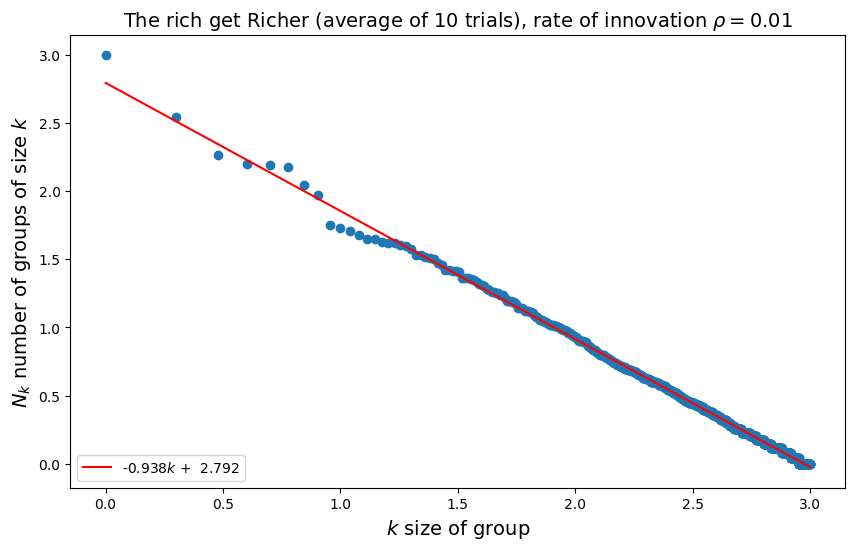

In [350]:
x = np.linspace(0,3,1000)
y = x*slope2 + intercept2
#plot them:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

plt.plot(np.log10(y1), np.log10(sorted(avg_uni_counts_001,reverse=True)), 'o', label='')
plt.plot(x,y,color='red', label=r'{}$k$ +  {}'.format(round(slope2,3),round(intercept2,3)))
plt.title(r'The rich get Richer (average of 10 trials), rate of innovation $\rho=0.01$', fontsize=14)
plt.xlabel(r'$k$ size of group',fontsize=14)
plt.ylabel(r'$N_k$ number of groups of size $k$',fontsize=14)
plt.legend(loc='lower left')

In [312]:
p_0_0_0_1 = rich_get_richer(0.001)

#take the average over 10 trials:
for i in range(10):
    p_0_0_0_1.append(rich_get_richer(0.001))

KeyboardInterrupt: 

# Problem 4

In [119]:
pwd = os.getcwd()
pwd

'C:\\Users\\Dave Landay\\Documents\\FALL_2018_POCS'

In [120]:
#open the text file as a dictionary of words and their frequencies:
ulysses = {}
with open(pwd+'/HW04_Ulysses_text_file/ulysses.txt', 'r', newline='') as txtfile:
    reader = csv.reader(txtfile, delimiter=':')
    for line in reader:
        try:
            ulysses[line[0]] = int(line[1])
        except:
            pass

In [158]:
max(ulysses.values())

14924

In [121]:
sorted_by_value = sorted(ulysses.items(), key=lambda kv: kv[1], reverse=True)

In [160]:
raw_counts = [i[1] for i in sorted_by_value]

In [262]:
counts_of_counts = np.unique(raw_counts,return_counts=True)

In [123]:
y3 = [i for i in range(len(raw_counts))]

In [132]:
total_number_of_words = sum(raw_counts)

In [133]:
num_unique_words = len(raw_counts)

In [134]:
total_number_of_words

264706

In [135]:
num_unique_words

31398

In [136]:
num_unique_words/total_number_of_words

0.11861461394906046

In [270]:
counts_of_counts = np.array([counts_of_counts[0],counts_of_counts[1]/np.sum(counts_of_counts[1])])

In [173]:
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(y3[1:]), np.log10(raw_counts[1:]))

In [174]:
slope

-1.0110971756949425

C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


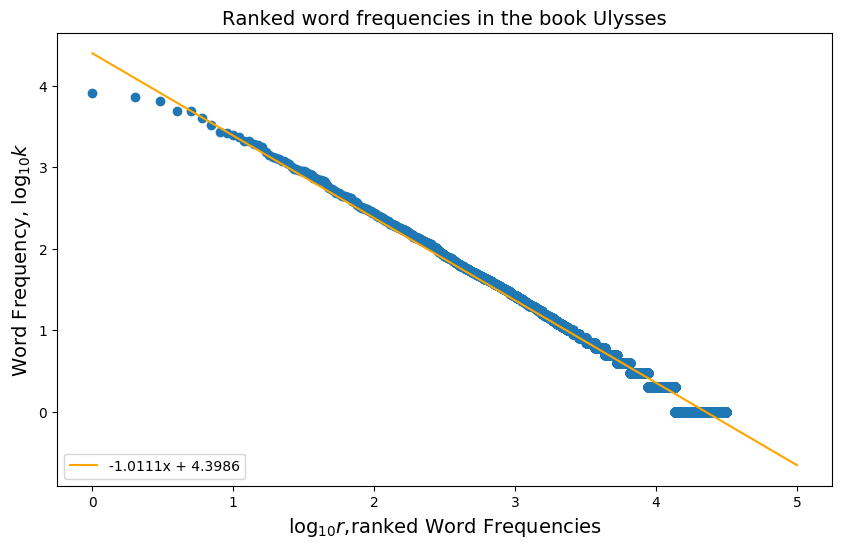

In [313]:
x = np.linspace(0,5,1000)
y = x*slope + intercept
#plot them:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(np.log10(y3), np.log10(raw_counts), 'o')
plt.plot(x,y,color='orange', label=r'{}x + {}'.format(round(slope,4),round(intercept,4)))
plt.title(r'Ranked word frequencies in the book Ulysses' , fontsize=14)
plt.ylabel(r'Word Frequency, $\log_{10}k$',fontsize=14)
plt.xlabel(r'$\log_{10}r$,ranked Word Frequencies',fontsize=14)
plt.legend(loc='lower left')

In [284]:
actual = pd.DataFrame()
actual['counts'] = counts_of_counts[0]
actual['counts_of_counts'] = counts_of_counts[1]

In [296]:
print(actual['counts_of_counts'][:3])
print('estimate n_1: ',0.385)
print('estimate n_2: ', 0.169)
print('estimate n_3: ', 0.105)

0    0.564940
1    0.155647
2    0.071374
Name: counts_of_counts, dtype: float64
estimate n_1:  0.385
estimate n_2:  0.169
estimate n_3:  0.105


# Problem 6

In [12]:
#We will want to generate a power-law distribution:

#define a gamma, upper bound of k, and lower bound of k:
gamma   = 5/2
u_bound = 10**6
l_bound = 1

#generate the distribution:
distribution = [i**(-gamma) for i in range(l_bound, u_bound)]

#now draw from it:
#N_10 = [[np.random.choice(distribution) for i in range(10)] for j in range(1000)]

In [13]:
N_10 = [ max(np.random.choice(distribution, size=10, replace=True)) for i in range(1000)]

In [14]:
N_100 = [max(np.random.choice(distribution, size=100, replace=True)) for i in range(1000)]

In [15]:
N_1000 = [max(np.random.choice(distribution, size=1000, replace=True)) for i in range(1000)]

In [16]:
N_10e4 = [max(np.random.choice(distribution, size=10**4, replace=True)) for i in range(1000)]

In [17]:
N_10e5 = [max(np.random.choice(distribution, size=10**5, replace=True)) for i in range(1000)]

In [18]:
N_10e6 = [max(np.random.choice(distribution, size=10**6, replace=True)) for i in range(1000)]

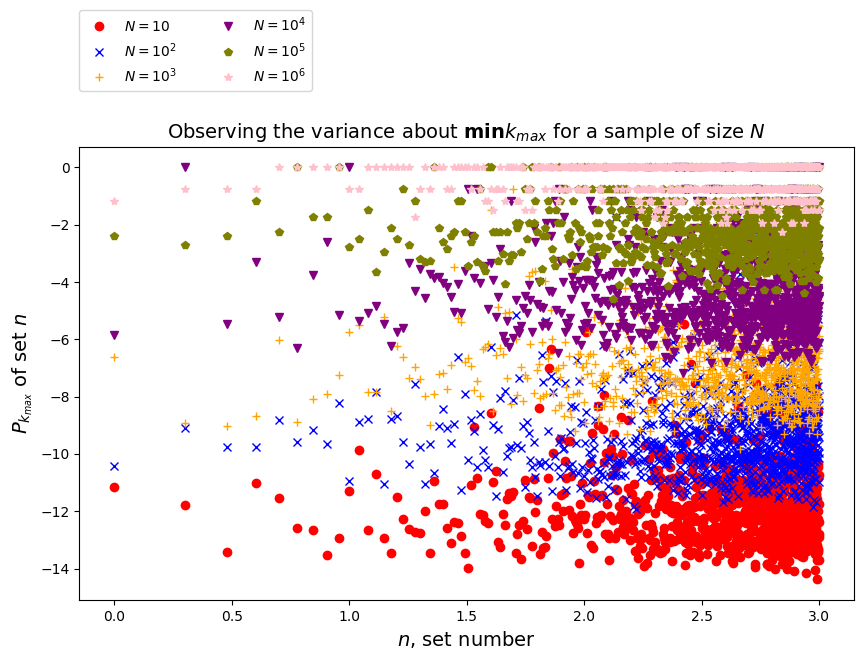

In [19]:
#plot them:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

plt.plot([np.log10(i) for i in range(l_bound, 1000+1)], np.log10(N_10), 'o', color='red', label=r'$N=10$')
plt.plot([np.log10(i) for i in range(l_bound, 1000+1)], np.log10(N_100), 'x', color='blue', label=r'$N=10^2$')
plt.plot([np.log10(i) for i in range(l_bound, 1000+1)], np.log10(N_1000), '+', color='orange', label=r'$N=10^3$')
plt.plot([np.log10(i) for i in range(l_bound, 1000+1)], np.log10(N_10e4), 'v', color='purple', label=r'$N=10^4$')
plt.plot([np.log10(i) for i in range(l_bound, 1000+1)], np.log10(N_10e5), 'p', color='olive', label=r'$N=10^5$')
plt.plot([np.log10(i) for i in range(l_bound, 1000+1)], np.log10(N_10e6), '*', color='pink', label=r'$N=10^6$')

plt.title(r'Observing the variance about $\mathbf{min}k_{max}$ for a sample of size $N$ ', fontsize=14)
plt.xlabel(r'$n$, set number',fontsize=14)
plt.ylabel(r'$P_{k_{max}}$ of set $n$',fontsize=14)
plt.legend(bbox_to_anchor=(0., 1.2, 0.3, .102), loc=1,
           ncol=2, mode="expand", borderaxespad=0.)

In [326]:
avg_10 = np.average(N_10)
avg_10e2 = np.average(N_100)
avg_10e3 = np.average(N_1000)
avg_10e4 = np.average(N_10e4)
avg_10e5 = np.average(N_10e5)
avg_10e6 = np.average(N_10e6)

In [332]:
avgs = np.array([avg_10.item(0), avg_10e2.item(0), avg_10e3.item(0), avg_10e4.item(0), avg_10e5.item(0), avg_10e6.item(0)])
pr_kmax = [10,10**2,10**3,10**4,10**5,10**6]

slopea, intercepta, r_valuea, p_valuea, std_erra = stats.linregress(np.log10(pr_kmax), np.log10(avgs))

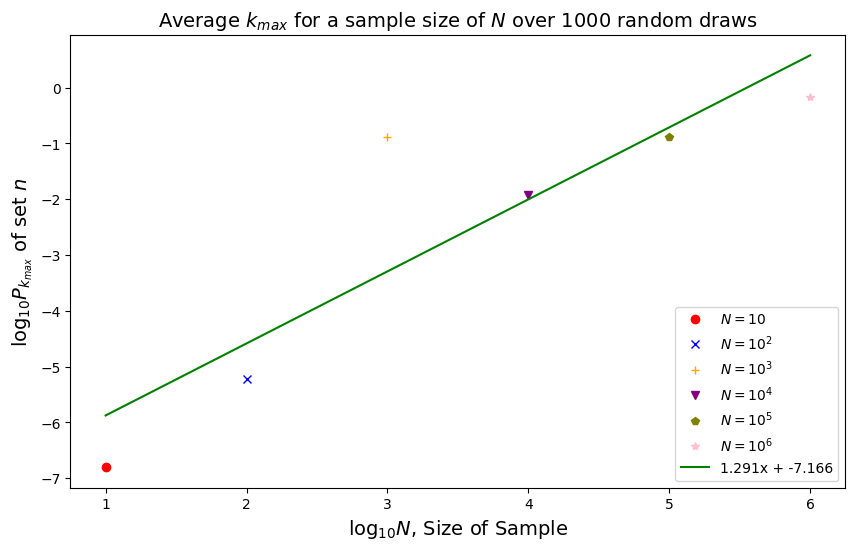

In [333]:
x = np.linspace(1,6,1000)
y = x*slopea + intercepta
#plot them:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

plt.plot(1, np.log10(avg_10), 'o', color='red', label=r'$N=10$')
plt.plot(2, np.log10(avg_10e2), 'x', color='blue', label=r'$N=10^2$')
plt.plot(3, np.log10(avg_10e3), '+', color='orange', label=r'$N=10^3$')
plt.plot(4, np.log10(avg_10e4), 'v', color='purple', label=r'$N=10^4$')
plt.plot(5, np.log10(avg_10e5), 'p', color='olive', label=r'$N=10^5$')
plt.plot(6, np.log10(avg_10e6), '*', color='pink', label=r'$N=10^6$')

plt.plot(x,y,color='green',label=r'{}x + {}'.format(round(slopea,3), round(intercepta,3)))
plt.title(r'Average $k_{max}$ for a sample size of $N$ over 1000 random draws', fontsize=14)
plt.xlabel(r'$\log_{10}N$, Size of Sample',fontsize=14)
plt.ylabel(r'$\log_{10}P_{k_{max}}$ of set $n$',fontsize=14)
plt.legend(loc='lower right')